In [1]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time
import cv2

from joblib import Parallel, delayed

sys.path.append(os.path.join(os.environ['GORDON_REPO_DIR'], 'utilities'))
from utilities2015 import *

from matplotlib.path import Path
%matplotlib inline

from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import distance_transform_edt
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
from skimage.measure import regionprops

from scipy.ndimage import label

In [2]:
img = imread('/oasis/projects/nsf/csd395/yuncong/CSHL_data_processed/MD589_lossless_aligned_cropped_grayscale/MD589_0134_lossless_aligned_cropped_grayscale.tif')
im = img[7245:7245+208, 2845:2845+190]

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/skimage/external/tifffile/tifffile_local.py:3246: UserWarning: unexpected end of lzw stream (code 0)
  warnings.warn("unexpected end of lzw stream (code %i)" % code)


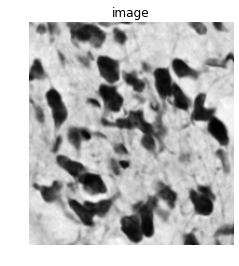

In [3]:
plt.imshow(im, cmap=plt.cm.gray);
plt.axis('off');
plt.title('image');

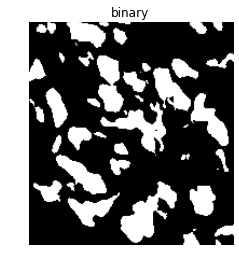

In [4]:
thresh = threshold_otsu(im)
binary = im < thresh

plt.imshow(binary, cmap=plt.cm.gray);
plt.axis('off');
plt.title('binary');

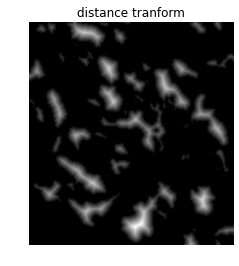

In [5]:
dt = distance_transform_edt(binary)

plt.imshow(dt, cmap=plt.cm.gray);
plt.axis('off');
plt.title('distance tranform');

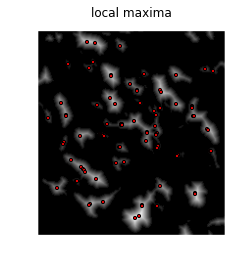

In [20]:
local_maxi = peak_local_max(dt, labels=binary, footprint=np.ones((10, 10)), indices=False)
rs, cs = np.where(local_maxi)

plt.imshow(dt, cmap=plt.cm.gray);

from matplotlib.patches import Circle
plt.scatter(cs, rs, s=10, c='r');

plt.axis('off');
plt.title('local maxima');

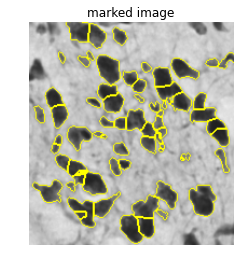

In [21]:
markers = label(local_maxi)[0]

labels = watershed(-dt, markers, mask=binary)

marked_im = mark_boundaries(im, labels)
plt.figure();
plt.imshow(marked_im);
plt.axis('off');
plt.title('marked image');

52


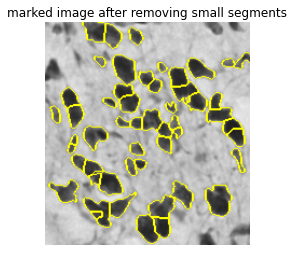

In [22]:
props = regionprops(labels)
num_segs = labels.max()

valid = [i for i, p in enumerate(props) if p.area > 40]
print len(valid)

new_labels = np.reshape([l if l-1 in valid else 0 for l in labels.flat], labels.shape)

new_marked_im = mark_boundaries(im, new_labels)

plt.figure();
plt.imshow(new_marked_im);
plt.axis('off');
plt.title('marked image after removing small segments');

Final Result

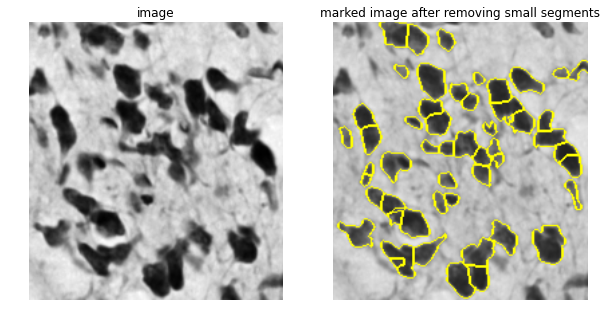

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,10));
axes[0].imshow(im, cmap=plt.cm.gray);
axes[0].axis('off');
axes[0].set_title('image');
axes[1].imshow(new_marked_im);
axes[1].axis('off');
axes[1].set_title('marked image after removing small segments');